In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import scipy.io
# import networkx as nx
# import matplotlib.pyplot as plt
#
# # Load the data from .mat files
# f = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 1/flow.mat')["flow"].reshape(28,)
# c = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 1/capacities.mat')["capacities"].reshape(28,)
# B = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 1/traffic.mat')["traffic"]
# l = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 1/traveltime.mat')["traveltime"].reshape(28,)

In [1]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

l = np.array([0.14583, 0.044833, 0.129, 0.18667, 0.12983, 0.078333, 0.094,
              0.057333, 0.14167, 0.10517, 0.10667, 0.10483, 0.11233, 0.1805,
              0.1215,   0.080667,0.075333 ,0.056667 ,0.032667 ,0.035, 0.066667,
              0.11283, 0.078333, 0.054167, 0.095833, 0.073, 0.165, 0.14867 ])

B = np.array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [-1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  1,  0,  0,  1,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  1,  0,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,],
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1]])

f = np.array([ 7000,  6537, 11139,  9282,  9282,  6398,  6728,  5988,  5951,  9557,
              7423,  7423,  6814,  8536,  7652,  6537, 11924,  9640,  8161,  8603,
               7974,  9446, 5562,  6719, 9455,  6686, 10833,  7403])
c = np.array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297, 11102,
              8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216, 10947, 10019,
               8732, 10763, 6677,  9403, 10355,  9067, 11990,  8258])

# print('B:',B)
# print('f:',f)
# print('c:',c)
# print('l:',l)

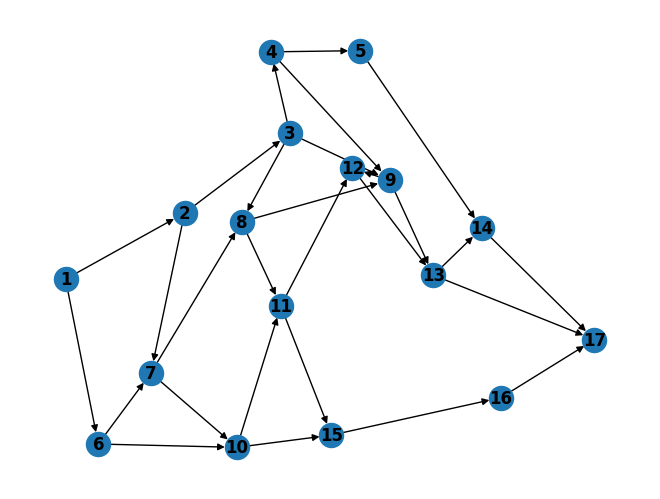

In [2]:
n_nodes = B.shape[0]
n_edges = B.shape[1]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the node-link incidence matrix B
for i in range(n_edges):
    tail_node = list(B[:, i]).index(1) + 1
    head_node = list(B[:, i]).index(-1) + 1
    G.add_edge(tail_node, head_node, capacity=c[i], travel_time=l[i])

# Draw Graph
nx.draw(G, with_labels=True, font_weight='bold')

HOMEWORK 1 ES 3 PUNTO A

In [3]:
# Find the shortest path between node 1 and node 17
shortest_path = nx.shortest_path(G, source=1, target=17, weight='travel_time')

print("Shortest path between node 1 and 17:", shortest_path)

Shortest path between node 1 and 17: [1, 2, 3, 9, 13, 17]


HOMEWORK 1
ES 3
PUNTO B


In [4]:
# Find the maximum flow between node 1 and node 17
max_flow_value = nx.maximum_flow_value(G, 1, 17, capacity='capacity')

print("Maximum flow value between node 1 and 17:", max_flow_value)

Maximum flow value between node 1 and 17: 22448


HOMEWORK 1
ES 3
PUNTO C

In [5]:
# external flow v = B*f
v = np.dot(B, f)

print("External inflow vector v:", v)

External inflow vector v: [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In [6]:
# Modify the External Inflow Vector = [d(1) 0 0 ... 0 0 -d(17)] with d(1) and d(17) equals to 16282
nu = np.zeros((n_nodes))
nu[0] = v[0]
nu[-1] = -v[0]

print("Modified External Inflow Vector (v):", nu)

Modified External Inflow Vector (v): [ 16282.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0. -16282.]


D

In [7]:
# define cost function
def cost_function(flow):
    cost=0
    for i in range(flow.__len__()):
        cost += l[i]*flow[i] / (1-flow[i]/c[i])
    return round(cost)

# Construct minimization problem with constraints
f = cp.Variable(n_edges)
objective = cp.Minimize( cp.sum(l*c*cp.inv_pos(1-f/c)-l*c) )
constraints = [B @ f == nu, f >= 0, f <= c]
prob = cp.Problem(objective, constraints)

# Find the Optimal solution of this problem
prob.solve()

# Save flow vector and optimal cost
opt_flow = f.value
cost_opt = cost_function(opt_flow)

print("Social optimal flow:", list(map(lambda x: 0 if x < 0.01 else round(x), f.value)))
print("Optimal cost:", cost_opt)

Social optimal flow: [6454, 5919, 2995, 2995, 9828, 4497, 2897, 2436, 3047, 535, 0, 2924, 0, 2995, 5331, 2731, 4734, 2134, 461, 2313, 3192, 5505, 2311, 0, 6242, 5306, 4734, 4734]
Optimal cost: 23835


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


E

In [8]:
# Construct minimization problem with constraints, this time using a different objective function
f = cp.Variable(n_edges)
objective = cp.Minimize( cp.sum(-l*c*cp.log(1-f/c)) )
constraints = [B @ f == nu, f>=0, f<=c]
prob = cp.Problem(objective, constraints)

# Find the wardrop solution of this problem
prob.solve()

# Save flow vector and wardrop cost
wardrop_flow = f.value
cost_wardrop = cost_function(wardrop_flow)

print("wardrop flow:", list(map(lambda x: 0 if x < 0.01 else round(x), f.value)))
print("wardrop cost:", cost_wardrop)

wardrop flow: [6532, 6532, 2207, 2207, 9750, 4493, 2714, 2204, 3343, 0, 189, 4137, 0, 2207, 5256, 2247, 4788, 1779, 699, 2998, 2947, 5945, 2508, 0, 6779, 4715, 4788, 4788]
wardrop cost: 24162


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


F

In [9]:
# Construct minimization problem with constraints, this time using Tolls in the objective function
f = cp.Variable(n_edges)
w = l*c*opt_flow/((c-opt_flow)**2)  # Tolls creations
objective = cp.Minimize( cp.sum(-l*c*cp.log(1-f/c) + w*f ) )
constraints = [B @ f == nu, f>=0, f<=c]
prob = cp.Problem(objective, constraints)

# Find the wardrop solution with Tolls of this problem
prob.solve()

# Save flow vector and wardrop with Tolls cost
tolls_flow = f.value
cost_tolls = cost_function(tolls_flow)

print("wardrop tolls flow:", list(map(lambda x: 0 if x < 0.01 else round(x), f.value)))
print("wardrop cost:", cost_tolls)

wardrop tolls flow: [6454, 5919, 2995, 2995, 9828, 4497, 2897, 2436, 3047, 535, 0, 2924, 0, 2995, 5331, 2731, 4734, 2134, 462, 2313, 3192, 5505, 2310, 0, 6242, 5306, 4734, 4734]
wardrop cost: 23835


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)


G

In [10]:
# define another cost function
def cost_function_2(flow):
    cost=0
    for i in range(flow.__len__()):
        cost += l[i]*flow[i] / (1-flow[i]/c[i]) - l[i] * flow[i]
    return round(cost)

# OPTIMAL
f = cp.Variable(n_edges)
objective = cp.Minimize( cp.sum(l*c*cp.inv_pos(1-f/c)-l*c-l*f) )
constraints = [B @ f == nu, f >= 0, f <= c]
prob = cp.Problem(objective, constraints)
prob.solve()
# Save flow vector and cost
opt_flow_2 = f.value
cost_opt_2 = cost_function_2(opt_flow_2)

# WARDROP
f = cp.Variable(n_edges)
objective = cp.Minimize( cp.sum(-l*c*cp.log(1-f/c))-l*f )
constraints = [B @ f == nu, f >= 0, f <= c]
prob = cp.Problem(objective, constraints)
prob.solve()
# Save flow vector and cost
wardrop_flow_2 = f.value
cost_wardrop_2 = cost_function_2(wardrop_flow_2)

# WARDROP WITH TOLLS
f = cp.Variable(n_edges)
w = l*c*opt_flow_2/((c-opt_flow_2)**2)  # Tolls creations
objective = cp.Minimize( cp.sum(-l*c*cp.log(1-f/c)-l*f + w*f ) )
constraints = [B @ f == nu, f >= 0, f <= c]
prob = cp.Problem(objective, constraints)
prob.solve()
# Save flow vector and cost
tolls_flow_2 = f.value
cost_tolls_2 = cost_function_2(tolls_flow_2)


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 6 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/

RESULTS

In [ ]:
print("---- First cost function ----")
print("Optimal cost:        ", cost_opt)
print("wardrop cost:        ", cost_wardrop)
print("wardrop with Tolls:  ", cost_tolls)
print("Price of Anarchy:    ", cost_wardrop/cost_opt)
print("PoA with tolls:      ", cost_tolls/cost_opt)

print("\n---- Second cost function ----")
print("Optimal cost:        ", cost_opt_2)
print("wardrop cost:        ", cost_wardrop_2)
print("wardrop with Tolls:  ", cost_tolls_2)
print("Price of Anarchy:    ", cost_wardrop_2/cost_opt_2)
print("PoA with tolls:      ", cost_tolls_2/cost_opt_2)

---- First cost function ----
Optimal cost:         23835
wardrop cost:         24162
wardrop with Tolls:   23835
Price of Anarchy:     1.0137193203272499
PoA with tolls:       1.0

---- Second cost function ----
Optimal cost:         13334
wardrop cost:         13378
wardrop with Tolls:   13334
Price of Anarchy:     1.0032998350082496
PoA with tolls:       1.0
